# EXAMPLE 1

In [3]:
from mingle.utilities.db_utils import SingleSimReader, DBExtractor, df_contour
import matplotlib.pyplot as plt
from bin.coadd_analysis_module import compare_spectra
from bin.coadd_bhm_analysis_module import compare_spectra as bhm_compare_spectra
%matplotlib inline


/home/jneal/anaconda3/envs/sims/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
chi2_val = "chi2_123"   # Detector for is unreliable, wl offset?

In [5]:
correct1 = {"teff_1":5200, "logg_2": 4.5, "feh_1": 0.0, "gamma":0,
           "teff_2": 3000, "logg_2": 5.0, "feh_2": 0.0, "rv":-5}
ex1_base ="/home/jneal/Phd/Analysis/Paper_examples/Example1/analysis"
ex1_base500 ="/home/jneal/Phd/Analysis/Paper_examples/Example1-500/analysis"
# ex1_base ="/home/jneal/Documents/data/Paper_examples/Example1/analysis"

# EXAMPLE 1 - 150

In [4]:
try:
    iam1 = SingleSimReader(base=ex1_base,
                       name="Example1", mode="iam")

    extractor = DBExtractor(iam1.get_table())

    df_min = extractor.minimum_value_of(chi2_val)

    cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
            chi2_val, 'teff_1','logg_1', 'feh_1']


    fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print(df.shape)
    df.head()
except:
    pass 

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example1/analysis/EXAMPLE1/iam for
 EXAMPLE1**_coadd_iam_chisqr_results.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(140400, 12)


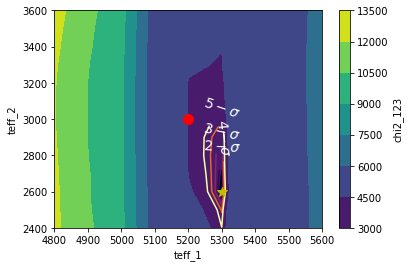

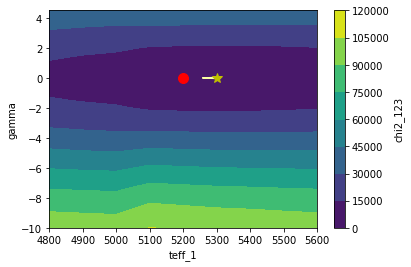

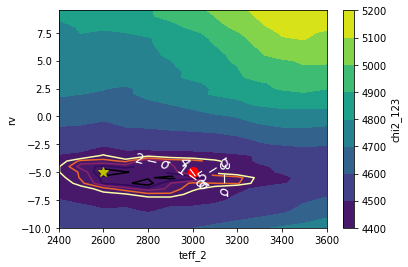

In [5]:
try:
    df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], correct=correct1, dof=4)
    plt.show()
    df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct1, dof=4)
    plt.show()
    df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct1, dof=4)
except:
    pass


# EXAMPLE 1 - 500

In [6]:
try:
    iam1500 = SingleSimReader(base=ex1_base,
                           name="Example1500", mode="iam", chi2_val=chi2_val)

    extractor = DBExtractor(iam1500.get_table())
    
    df_min = extractor.minimum_value_of(chi2_val)
    cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
            chi2_val, 'teff_1','logg_1', 'feh_1']


    fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print("df shape", df.shape)
    
    print(df.head())

    df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], correct=correct1, dof=4)
    plt.show()
    df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct1, dof=4)
    plt.show()
    df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct1, dof=4)
except Exception as e:
    print(e)

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example1/analysis/EXAMPLE1500/iam for
 EXAMPLE1500**_coadd_iam_chisqr_results.db
check number of databases found (should be 1)
[] 0
len(dbs)=0 not 1


# EXAMPLE 1 - 150 BHM


looking in  /home/jneal/Phd/Analysis/Paper_examples/Example1/analysis/EXAMPLE1/bhm for
 EXAMPLE1**_coadd_bhm_chisqr_results.db
{'logg_1': 4.5, 'feh_1': 0.0}
(270, 8)


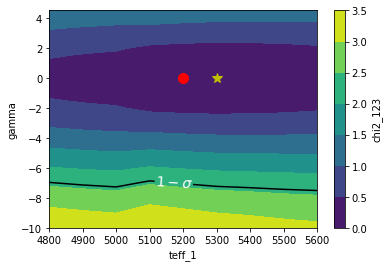

Exception =  Index contains duplicate entries, cannot reshape


In [7]:
try:
    bhm1 = SingleSimReader(base=ex1_base,
                           name="Example1", mode="bhm", chi2_val=chi2_val)

    extractor = DBExtractor(bhm1.get_table())
    df_min = extractor.minimum_value_of(chi2_val)

    cols = ['gamma', chi2_val, 'teff_1','logg_1', 'feh_1']

    fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
    print(fixed)
    df = extractor.fixed_extraction(cols, fixed, limit=-1)
    print(df.shape)
    df.head()

    df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct1, dof=2)
    plt.show()
    df_contour(df, "logg_1", "gamma", chi2_val, df_min, [], correct=correct1, dof=2)
    plt.show()
except Exception as e:
    print("Exception = ",  e)
    #raise e

# EXAMPLE 1 - 500 BHM

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example1-500/analysis/EXAMPLE1500/bhm for
 EXAMPLE1500**_coadd_bhm_chisqr_results.db


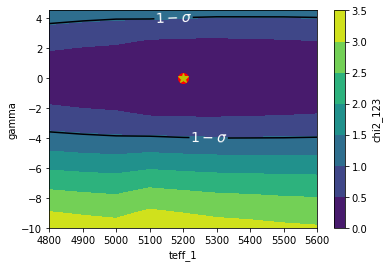

In [8]:
bhm1500 = SingleSimReader(base=ex1_base500,
                       name="Example1500", mode="bhm", chi2_val=chi2_val)
extractor = DBExtractor(bhm1500.get_table())
df_min = extractor.minimum_value_of(chi2_val)
cols = ['gamma', chi2_val, 'teff_1','logg_1', 'feh_1']

fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
df = extractor.fixed_extraction(cols, fixed, limit=-1)
df.head()

df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct1)
plt.show()

# Example 2

In [9]:
!cat Example2/Example2.sh | grep no-plots

!cat Example2-500/Example2.sh | grep no-plots

#                              [-m {scalar,linear}] [--no-plots | --only-plots]
iam_fake_full_stack.py -n 150 -j 4 --renormalize -m linear --no-plots EXAMPLE2 1 6200 4.5 0.0 2500 5.0 0.0 -15 20
bhm_fake_full_stack.py -n 150 -j 4 --renormalize -m linear --no-plots EXAMPLE2 1 6200 4.5 0.0 -15
#                              [-m {scalar,linear}] [--no-plots | --only-plots]
iam_fake_full_stack.py -n 500 -j 2 --renormalize -m linear --no-plots EXAMPLE2500 1 6200 4.5 0.0 2500 5.0 0.0 -15 20
bhm_fake_full_stack.py -n 500 -j 2 --renormalize -m linear --no-plots EXAMPLE2500 1 6200 4.5 0.0 -15


In [10]:
correct2 = {"teff_1":6200, "logg_2": 4.5, "feh_1": 0.0, "gamma":-15,
           "teff_2": 2500, "logg_2": 5.0, "feh_2": 0.0,  "rv":20}

ex2_base = "/home/jneal/Phd/Analysis/Paper_examples/Example2/analysis/"
ex2_base500 = "/home/jneal/Phd/Analysis/Paper_examples/Example2-500/analysis/"
# ex2_base ="/home/jneal/Documents/data/Paper_examples/Example2/analysis/"

# EXAMPLE 2 - 150

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example2/analysis/EXAMPLE2/iam for
 EXAMPLE2**_coadd_iam_chisqr_results.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(129600, 12)


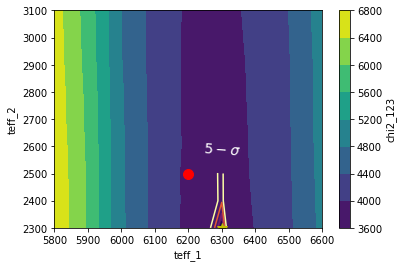

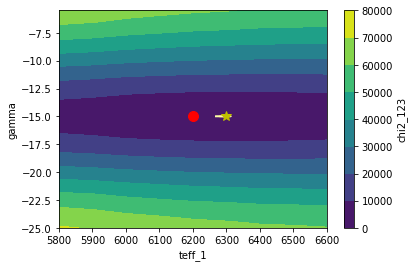

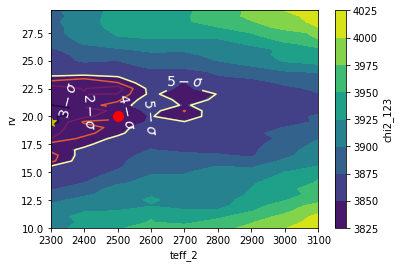

In [11]:
iam2 = SingleSimReader(base=ex2_base,
                       name="Example2", mode="iam", chi2_val=chi2_val)

extractor = DBExtractor(iam2.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
        chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], correct=correct2)
plt.show()
df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct2)
plt.show()
df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct2)

# EXAMPLE 2 - 500 

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example2-500/analysis/EXAMPLE2500/iam for
 EXAMPLE2500**_coadd_iam_chisqr_results.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(129600, 12)


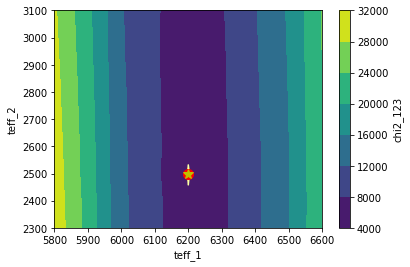

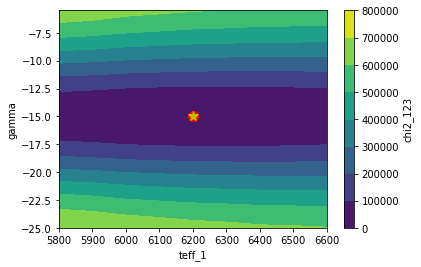

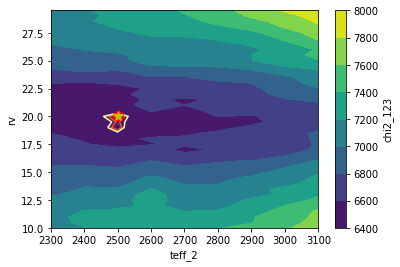

In [12]:
iam2500 = SingleSimReader(base=ex2_base500,
                       name="Example2500", mode="iam", chi2_val=chi2_val)

extractor = DBExtractor(iam2500.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
        chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], correct=correct2)
plt.show()
df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct2)
plt.show()
df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct2)

# EXAMPLE 2 - 150 BHM

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example2/analysis/EXAMPLE2/bhm for
 EXAMPLE2**_coadd_bhm_chisqr_results.db
{'logg_1': 4.5, 'feh_1': 0.0}
(360, 8)


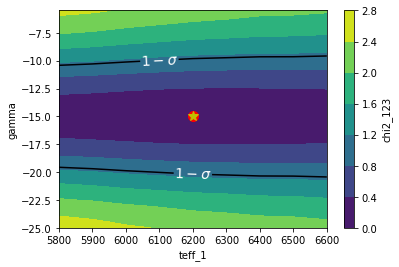

In [13]:
bhm2 = SingleSimReader(base=ex2_base,
                       name="Example2", mode="bhm", chi2_val=chi2_val)

extractor = DBExtractor(bhm2.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['gamma', chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct2)
plt.show()

## EXAMPLE 2 - 500 BHM

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example2-500/analysis/EXAMPLE2500/bhm for
 EXAMPLE2500**_coadd_bhm_chisqr_results.db
{'logg_1': 4.5, 'feh_1': 0.0}
(360, 8)


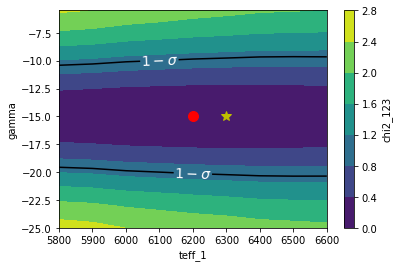

In [14]:
bhm2500 = SingleSimReader(base=ex2_base500,
                       name="Example2500", mode="bhm", chi2_val=chi2_val)

extractor = DBExtractor(bhm2500.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['gamma',  chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct2)
plt.show()

# EXAMPLE 3

In [15]:
ex3_base ="/home/jneal/Phd/Analysis/Paper_examples/Example3/analysis"
# ex3_base ="/home/jneal/Documents/data/Paper_examples/Example3/analysis"
!cat "/home/jneal/Phd/Analysis/Paper_examples/Example3/Example3.sh"


# Simulate an observation


# Bhm Simulation - one component
bhm_fake_full_stack.py -n 150 -j 4 --renormalize -m linear EXAMPLE3150 1 5200 4.5 0.0 0 -b

echo -e "comp_temp = 3000\ncomp_logg = 5.0 \ncomp_feh  = 0.0" >> .parameter_files/EXAMPLE3150_params.dat # Analyze the observation with 2 component model
iam_script.py -j 4 --renormalize -m linear EXAMPLE3150 1 -b

 
# Bhm Simulation - one component
bhm_fake_full_stack.py -n 500 -j 4 --renormalize -m linear EXAMPLE3500 1 5200 4.5 0.0 0 -b

echo -e "comp_temp = 3000\ncomp_logg = 5.0 \ncomp_feh  = 0.0" >> .parameter_files/EXAMPLE3500_params.dat 
# Analyze the observation with 2 component model
iam_script.py -j 4 --renormalize -m linear EXAMPLE3500 1 -b

 
# Bhm Simulation - one component
bhm_fake_full_stack.py -n 50 -j 4 --renormalize -m linear EXAMPLE350 1 5200 4.5 0.0 0 -b

echo -e "comp_temp = 3000\ncomp_logg = 5.0 \ncomp_feh  = 0.0" >> .parameter_files/EXAMPLE350_params.dat 
# Analyze the observation with 2 component model
iam_scrip

In [16]:
correct3 = {"teff_1": 5200, "logg_1": 4.5, "feh_1": 0.0, "gamma": 0, 
            "teff_2": 3000, "logg_2": 5, "feh_2": 0.0, "rv": 0}
# Companion doesn't actually exist.

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example3/analysis/EXAMPLE3150/iam for
 EXAMPLE3150**_coadd_iam_chisqr_results.db
{'logg_1': 4.5, 'logg_2': 5.5, 'feh_1': 0.0, 'feh_2': 0.0}
(360360, 12)


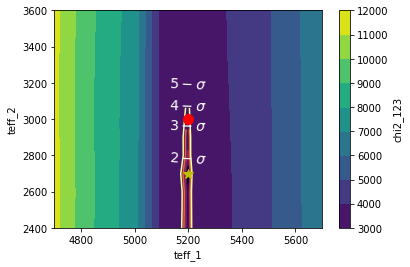

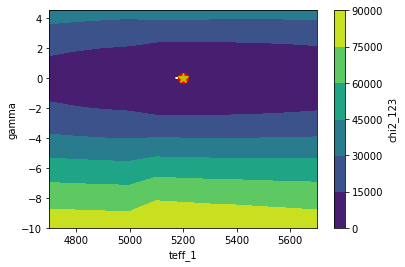

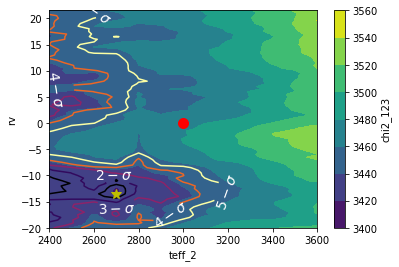

In [17]:
# EX 3 iam recovery on bhm sim. sne=150
sim_example = SingleSimReader(base=ex3_base,
                       name="Example3150", mode="iam", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
        chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], correct=correct3, dof=4)
plt.show()
df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct3, dof=4)
plt.show()
df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct3, dof=4)

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example3/analysis/EXAMPLE3500/iam for
 EXAMPLE3500**_coadd_iam_chisqr_results.db
{'logg_1': 4.5, 'logg_2': 5.5, 'feh_1': 0.0, 'feh_2': 0.0}
(360360, 12)


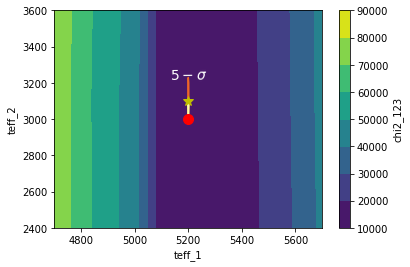

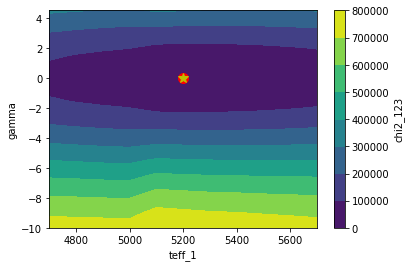

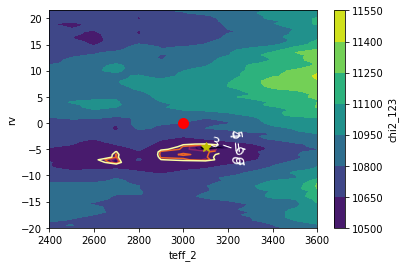

In [18]:
# EX 3 iam recovery on iam sim. sne=500
sim_example = SingleSimReader(base=ex3_base,
                       name="Example3500", mode="iam", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
        chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], correct=correct3, dof=4)
plt.show()
df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct3, dof=4)
plt.show()
df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct3, dof=4)

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example3/analysis/EXAMPLE350/iam for
 EXAMPLE350**_coadd_iam_chisqr_results.db
{'logg_1': 4.5, 'logg_2': 5.5, 'feh_1': 0.0, 'feh_2': 0.0}
(360360, 12)


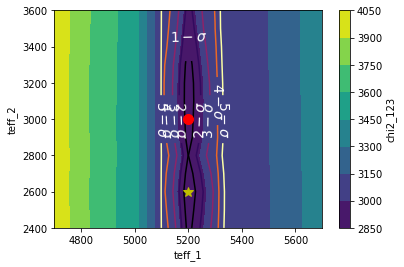

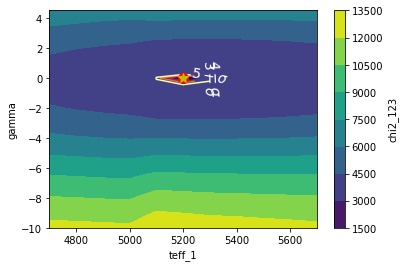

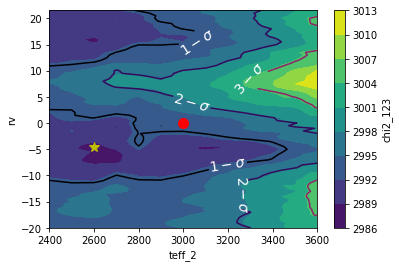

In [19]:
# EX 3 iam recovery on iam sim. sne=50
sim_example = SingleSimReader(base=ex3_base,
                       name="Example350", mode="iam", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
        chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], correct=correct3, dof=4)
plt.show()
df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct3, dof=4)
plt.show()
df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct3, dof=4)

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example3/analysis/EXAMPLE3150/bhm for
 EXAMPLE3150**_coadd_bhm_chisqr_results.db
{'logg_1': 4.5, 'feh_1': 0.0}
(330, 8)


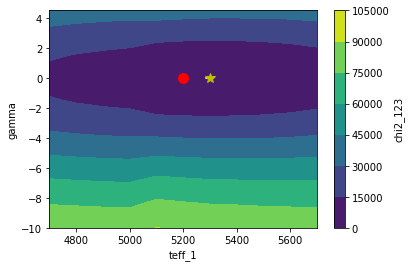

In [20]:
# EX 3 bhm recovery  on bhm sim. snr=150
sim_example = SingleSimReader(base=ex3_base,
                       name="Example3150", mode="bhm", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['gamma',  chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct3, dof=2)
plt.show()

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example3/analysis/EXAMPLE3500/bhm for
 EXAMPLE3500**_coadd_bhm_chisqr_results.db
{'logg_1': 4.5, 'feh_1': 0.0}
(330, 8)


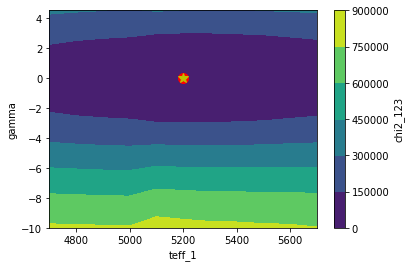

In [21]:
# EX 3 bhm recovery on bhm sim. snr=500
sim_example = SingleSimReader(base=ex3_base,
                       name="Example3500", mode="bhm", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['gamma',  chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct3, dof=2)
plt.show()

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example3/analysis/EXAMPLE350/bhm for
 EXAMPLE350**_coadd_bhm_chisqr_results.db
{'logg_1': 4.5, 'feh_1': 0.0}
(330, 8)


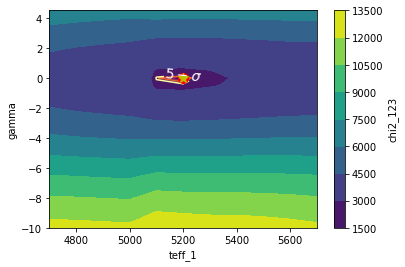

In [22]:
# EX 3 bhm recovery on bhm sim. snr=50
sim_example = SingleSimReader(base=ex3_base,
                       name="Example350", mode="bhm", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['gamma',  chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct3, dof=2)
plt.show()

# Example 4

In [23]:
ex4_base ="/home/jneal/Phd/Analysis/Paper_examples/Example4/analysis"
# ex4_base ="/home/jneal/Documents/data/Paper_examples/Example4/analysis"
!cat "/home/jneal/Phd/Analysis/Paper_examples/Example4/Example4.sh"
correct4 = {"teff_1": 5200, "logg_1": 4.5, "feh_1": 0.0, "gamma": 0, 
            "teff_2": 3000, "logg_2": 5, "feh_2": 0.0, "rv": -5.2}


# Simulate an observation

iam_fake_full_stack.py -n 150 -j 2 --renormalize -m linear --no-plots EXAMPLE4150 1 5200 4.5 0.0 3000 5.0 0.0 0 -5.2

# Analyze the observation
iam_fake_full_stack.py -n 150 -j 2 --renormalize -m linear --only-plots EXAMPLE4150 1 5200 4.5 0.0 3000 5.0 0.0 0 -5.2

# bhm anlaysis afterwards
bhm_script.py -j 4 --renormalize -m linear EXAMPLE4150 1 5200 4.5 0.0 0 -b

# Simulate an observation

iam_fake_full_stack.py -n 500 -j 2 --renormalize -m linear --no-plots EXAMPLE4500 1 5200 4.5 0.0 3000 5.0 0.0 0 -5.2

# Analyze the observation
iam_fake_full_stack.py -n 500 -j 2 --renormalize -m linear --only-plots EXAMPLE4500 1 5200 4.5 0.0 3000 5.0 0.0 0 -5.2

# bhm anlaysis afterwards
bhm_script.py -j 4 --renormalize -m linear EXAMPLE4500 1 5200 4.5 0.0 0 -b

 


looking in  /home/jneal/Phd/Analysis/Paper_examples/Example4/analysis/EXAMPLE4150/iam for
 EXAMPLE4150**_coadd_iam_chisqr_results.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(140400, 12)


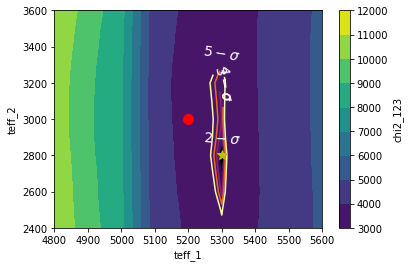

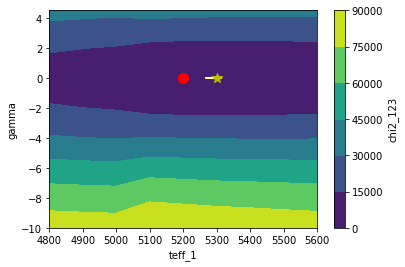

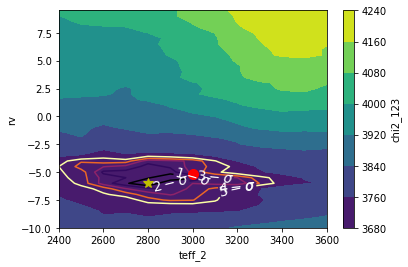

In [24]:
# EX 4 iam recovery on iam sim. sne=150
sim_example = SingleSimReader(base=ex4_base,
                       name="Example4150", mode="iam", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
        chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], correct=correct4, dof=4)
plt.show()
df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct4, dof=4)
plt.show()
df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct4, dof=4)

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example4/analysis/EXAMPLE4500/iam for
 EXAMPLE4500**_coadd_iam_chisqr_results.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(140400, 12)


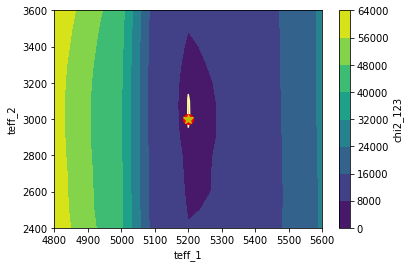

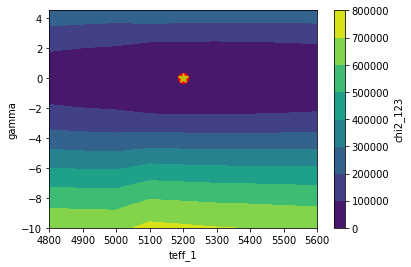

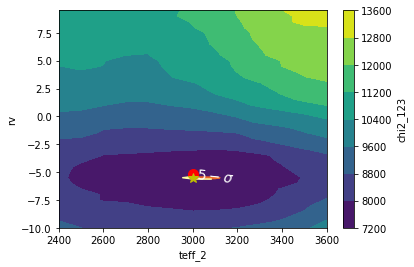

In [25]:
# EX 4 iam recovery on iam sim. sne=500
sim_example = SingleSimReader(base=ex4_base,
                       name="Example4500", mode="iam", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
        chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], correct=correct4, dof=4)
plt.show()
df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct4, dof=4)
plt.show()
df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct4, dof=4)

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example4/analysis/EXAMPLE4150/bhm for
 EXAMPLE4150**_coadd_bhm_chisqr_results.db
{'logg_1': 4.5, 'feh_1': 0.0}
(270, 8)


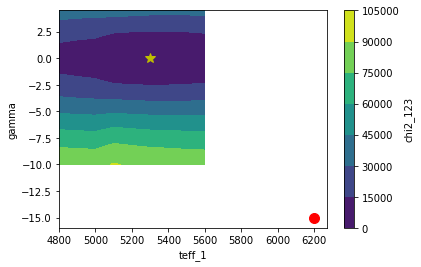

In [26]:
# EX 4 bhm recovery  on iam sim. snr=150
sim_example = SingleSimReader(base=ex4_base,
                       name="Example4150", mode="bhm", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['gamma',  chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct2, dof=2)
plt.show()

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example4/analysis/EXAMPLE4500/bhm for
 EXAMPLE4500**_coadd_bhm_chisqr_results.db
{'logg_1': 4.5, 'feh_1': 0.0}
(270, 8)


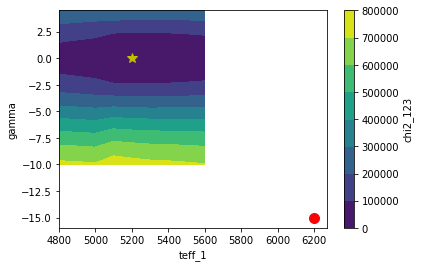

In [27]:
# EX 4 bhm recovery  on iam sim. snr=500
sim_example = SingleSimReader(base=ex4_base,
                       name="Example4500", mode="bhm", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['gamma',  chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct2, dof=2)
plt.show()

# Example 5

In [28]:
correct5 = correct2
ex5_base ="/home/jneal/Phd/Analysis/Paper_examples/Example5/analysis"
# ex5_base ="/home/jneal/Documents/data/Paper_examples/Example5/analysis"
!cat "/home/jneal/Phd/Analysis/Paper_examples/Example5/Example5.sh"


# Simulate an observation

iam_fake_full_stack.py -n 150 -j 4 --renormalize -m linear --no-plots EXAMPLE5150 1 6200 4.5 0.0 2500 5.0 0.0 -15 20 


# Analyze the observation
iam_fake_full_stack.py -n 150 -j 4 --renormalize -m linear --only-plots EXAMPLE5150 1 6200 4.5 0.0 2500 5.0 0.0 -15 20


# Do bhm anlaysis afterwards
bhm_script.py -j 4 --renormalize -m linear EXAMPLE5150 1 6200 4.5 0.0 -15 -b

# Simulate an observation

iam_fake_full_stack.py -n 500 -j 4 --renormalize -m linear --no-plots EXAMPLE5500 1 6200 4.5 0.0 2500 5.0 0.0 -15 20


# Analyze the observation
iam_fake_full_stack.py -n 500 -j 4 --renormalize -m linear --only-plots EXAMPLE5500 1 6200 4.5 0.0 2500 5.0 0.0 -15 20


# Do bhm anlaysis afterwards
bhm_script.py -j 4 --renormalize -m linear EXAMPLE5500 1 6200 4.5 0.0 -15 -b




looking in  /home/jneal/Phd/Analysis/Paper_examples/Example5/analysis/EXAMPLE5150/iam for
 EXAMPLE5150**_coadd_iam_chisqr_results.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(129600, 12)


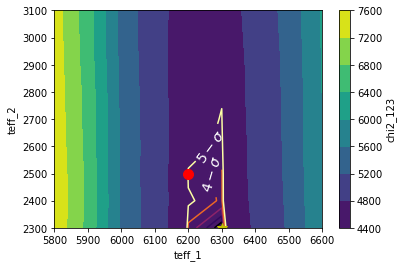

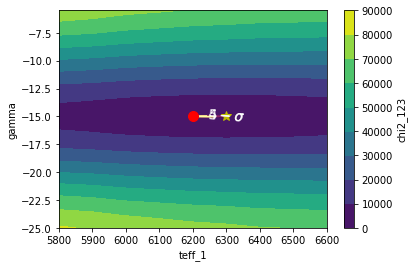

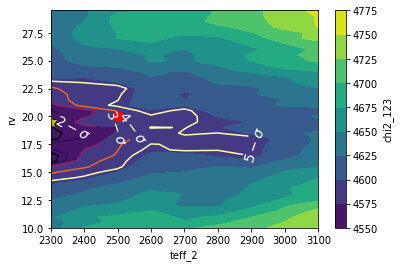

In [29]:
# EX 5 iam recovery on iam sim. sne=150
sim_example = SingleSimReader(base=ex5_base,
                       name="Example5150", mode="iam", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
        chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], correct=correct5, dof=4)
plt.show()
df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct5, dof=4)
plt.show()
df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct5, dof=4)

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example5/analysis/EXAMPLE5500/iam for
 EXAMPLE5500**_coadd_iam_chisqr_results.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(129600, 12)


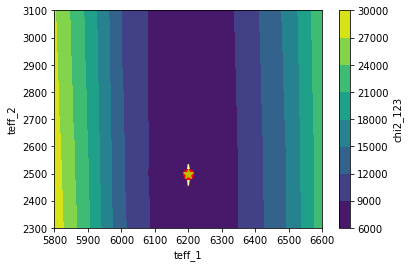

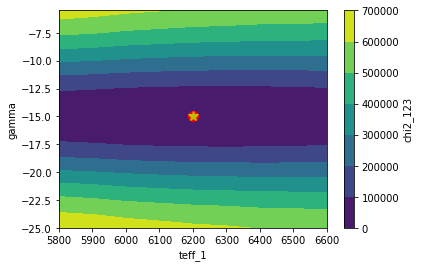

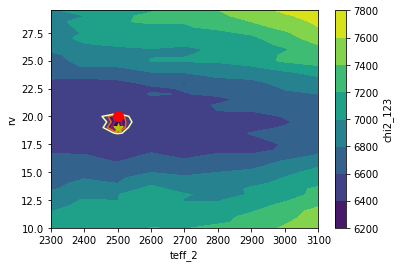

In [30]:
# EX 5 iam recovery on iam sim. sne=500
sim_example = SingleSimReader(base=ex5_base,
                       name="Example5500", mode="iam", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
        chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], correct=correct5, dof=4)
plt.show()
df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct5, dof=4)
plt.show()
df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct5, dof=4)

In [31]:
# Example 5 - BHM Recovery

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example5/analysis/EXAMPLE5150/bhm for
 EXAMPLE5150**_coadd_bhm_chisqr_results.db
{'logg_1': 4.5, 'feh_1': 0.0}
(360, 8)


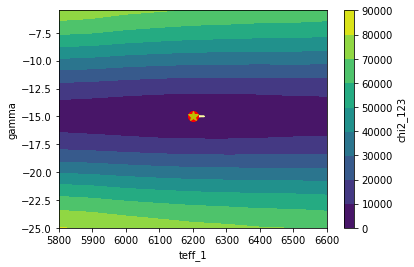

In [32]:
# EX 5 bhm recovery  on iam sim. snr=150
sim_example = SingleSimReader(base=ex5_base,
                       name="Example5150", mode="bhm", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['gamma',  chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct5, dof=2)
plt.show()

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example5/analysis/EXAMPLE5500/bhm for
 EXAMPLE5500**_coadd_bhm_chisqr_results.db
{'logg_1': 4.5, 'feh_1': 0.0}
(360, 8)


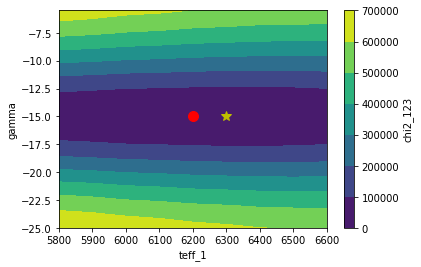

In [33]:
# EX 5 bhm recovery  on iam sim. snr=500
sim_example = SingleSimReader(base=ex5_base,
                       name="Example5500", mode="bhm", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['gamma', chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct5, dof=2)
plt.show()

# Example 6

A sun like star with a 4000K companion. (M-dwarf)

In [34]:
!cat Example6/Example6.sh 



# Simulate an observation

iam_fake_full_stack.py -n 150 -j 4 --renormalize -m linear EXAMPLE6150 1 5800 4.5 0.0 4000 5.0 0.0 -15 20 


# Do bhm anlaysis afterwards
bhm_script.py -j 4 --renormalize -m linear EXAMPLE6150 1 -b

# Simulate an observation

iam_fake_full_stack.py -n 500 -j 4 --renormalize -m linear  EXAMPLE6500 1 5800 4.5 0.0 4000 5.0 0.0 -15 20


# Do bhm anlaysis afterwards
bhm_script.py -j 4 --renormalize -m linear EXAMPLE6500 1 -b




In [35]:
ex6_base ="/home/jneal/Phd/Analysis/Paper_examples/Example6/analysis"
#  ="/home/jneal/Documents/data/Paper_examples/Example6/analysis"

correct6 = {"teff_1":5800, "logg_2": 4.5, "feh_1": 0.0, "gamma":-15,
           "teff_2": 4000, "logg_2": 5.0, "feh_2": 0.0,  "rv":20}

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example6/analysis/EXAMPLE6500/iam for
 EXAMPLE6500**_coadd_iam_chisqr_results.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(57200, 12)


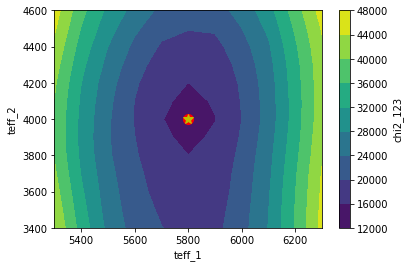

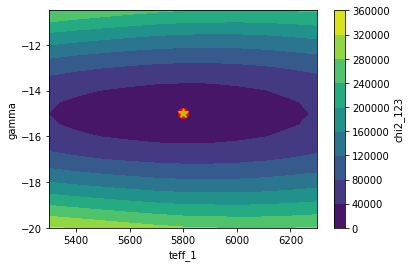

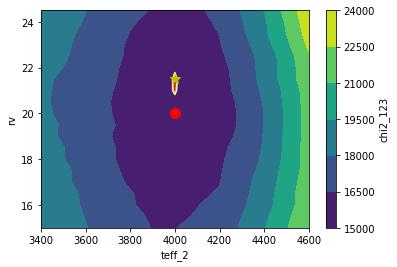

In [36]:
# EX 6 iam recovery on iam sim. sne=500
sim_example = SingleSimReader(base=ex6_base,
                       name="Example6500", mode="iam", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
        chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], correct=correct6, dof=4)
plt.show()
df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct6, dof=4)
plt.show()
df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct6, dof=4)

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example6/analysis/EXAMPLE6150/iam for
 EXAMPLE6150**_coadd_iam_chisqr_results.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(57200, 12)


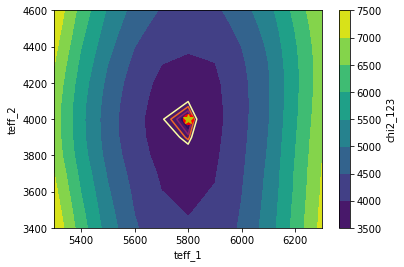

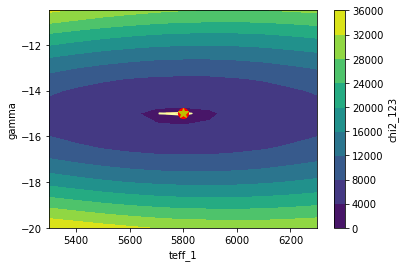

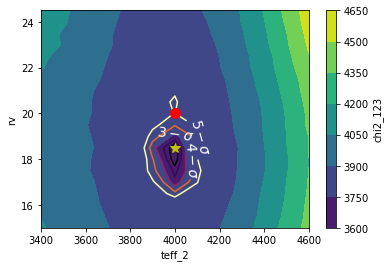

In [37]:
# EX 6 iam recovery on iam sim. sne=150
sim_example = SingleSimReader(base=ex6_base,
                       name="Example6150", mode="iam", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
        chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], correct=correct6, dof=4)
plt.show()
df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct6, dof=4)
plt.show()
df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct6, dof=4)

In [38]:
# Example 6 - BHM Recovery

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example6/analysis/EXAMPLE6150/bhm for
 EXAMPLE6150**_coadd_bhm_chisqr_results.db
{'logg_1': 4.5, 'feh_1': 0.0}
(220, 8)


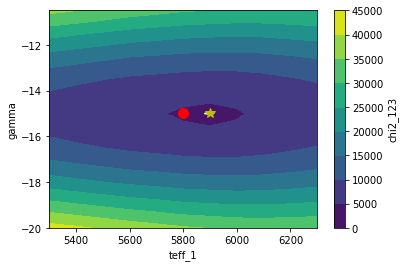

In [39]:
# EX 6 bhm recovery  on iam sim. snr=150
sim_example = SingleSimReader(base=ex6_base,
                       name="Example6150", mode="bhm", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['gamma',  chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct6, dof=2)
plt.show()

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example6/analysis/EXAMPLE6500/bhm for
 EXAMPLE6500**_coadd_bhm_chisqr_results.db
{'logg_1': 4.5, 'feh_1': 0.0}
(220, 8)


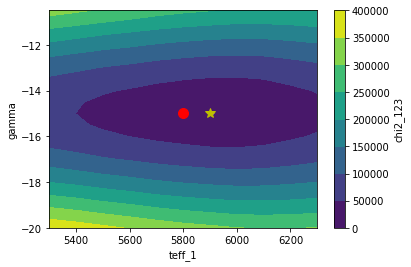

In [40]:
# EX 6 bhm recovery  on iam sim. snr=500
sim_example = SingleSimReader(base=ex6_base,
                       name="Example6500", mode="bhm", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['gamma',  chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct6, dof=2)
plt.show()

#  Example 7

Simulation with same parameters as HD211847  but different RVs

In [41]:
!cat Example7/Example7.sh 

# Simulate an observation
iam_fake_full_stack.py -n 150 -j 4 --renormalize -m linear EXAMPLE7150 1 5700 4.5 0.0 3200 5.0 0.0 -15 20 --no-plots

# Do bhm anlaysis afterwards
bhm_script.py -j 4 --renormalize -m linear EXAMPLE7150 1 -b

# Simulate an observation
iam_fake_full_stack.py -n 500 -j 4 --renormalize -m linear  EXAMPLE7500 1 5700 4.5 0.0 3200 5.0 0.0 -15 20 --no-plots

# Do bhm anlaysis afterwards
bhm_script.py -j 4 --renormalize -m linear EXAMPLE7500 1 -b

# Simulate an observation
iam_fake_full_stack.py -n 250 -j 4 --renormalize -m linear  EXAMPLE7250 1 5700 4.5 0.0 3200 5.0 0.0 -15 20 --no-plots

# Do bhm anlaysis afterwards
bhm_script.py -j 4 --renormalize -m linear EXAMPLE7250 1 -b




iam_fake_full_stack.py -n 150 -j 4 --renormalize -m linear EXAMPLE7150 1 5700 4.5 0.0 3200 5.0 0.0 -15 20 --only-plots
iam_fake_full_stack.py -n 500 -j 4 --renormalize -m linear  EXAMPLE7500 1 5700 4.5 0.0 3200 5.0 0.0 -15 20 --only-plots
iam_fake_full_stack.py -n 250 -j 4 --renormalize -m li

In [42]:
ex7_base ="/home/jneal/Phd/Analysis/Paper_examples/Example7/analysis"
# ex7_base ="/home/jneal/Documents/data/Paper_examples/Example7/analysis"

correct7 = None
correct7 = {"teff_1":5700, "logg_2": 4.5, "feh_1": 0.0, "gamma":-15,
           "teff_2": 3200, "logg_2": 5.0, "feh_2": 0.0,  "rv":20}

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example7/analysis/EXAMPLE7150/iam for
 EXAMPLE7150**_coadd_iam_chisqr_results.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(74800, 12)


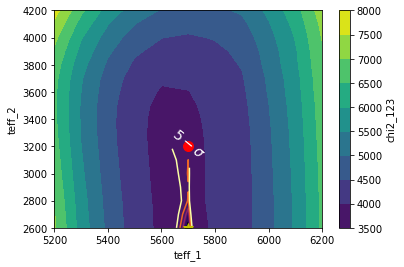

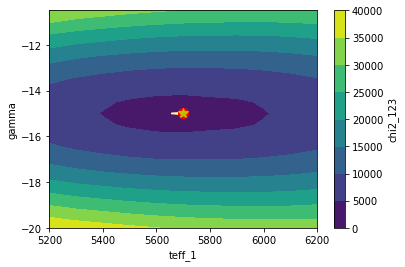

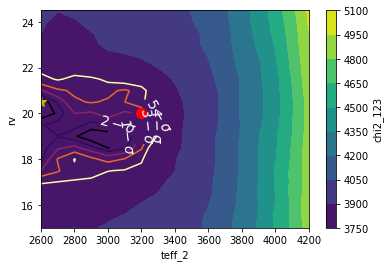

In [43]:
# EX 7 iam recovery on iam sim. sne=150
sim_example = SingleSimReader(base=ex7_base,
                       name="Example7150", mode="iam", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
        chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], correct=correct7, dof=4)
plt.show()
df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct7, dof=4)
plt.show()
df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct7, dof=4)

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example7/analysis/EXAMPLE7500/iam for
 EXAMPLE7500**_coadd_iam_chisqr_results.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(74800, 12)


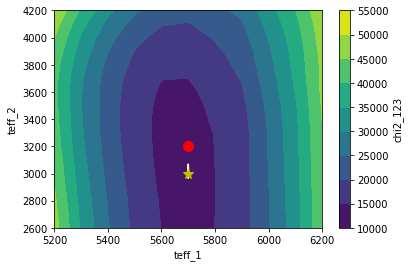

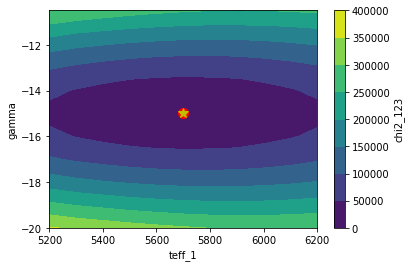

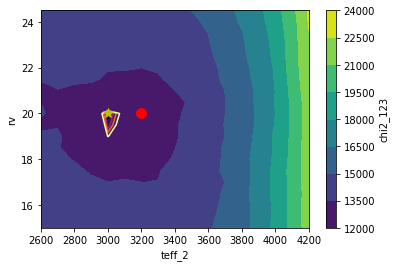

In [44]:
# EX 7 iam recovery on iam sim. sne=500
sim_example = SingleSimReader(base=ex7_base,
                       name="Example7500", mode="iam", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
        chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], correct=correct7, dof=4)
plt.show()
df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct7, dof=4)
plt.show()
df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct7, dof=4)

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example7/analysis/EXAMPLE7250/iam for
 EXAMPLE7250**_coadd_iam_chisqr_results.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(74800, 12)


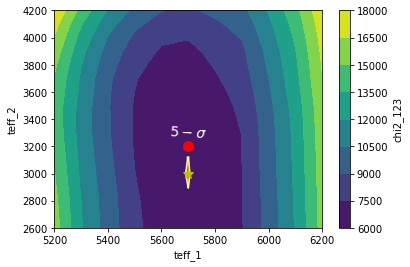

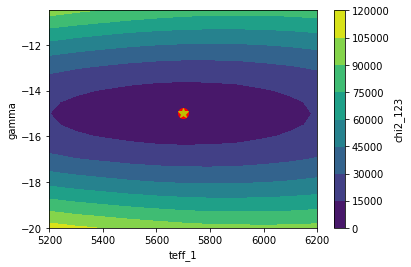

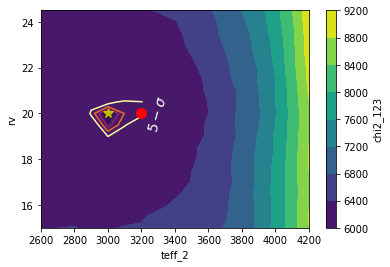

In [45]:
# EX 7 iam recovery on iam sim. sne=250
sim_example = SingleSimReader(base=ex7_base,
                       name="Example7250", mode="iam", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
        chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], correct=correct7, dof=4)
plt.show()
df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct7, dof=4)
plt.show()
df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct7, dof=4)

In [46]:
# Example 7 - BHM Recovery

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example7/analysis/EXAMPLE7150/bhm for
 EXAMPLE7150**_coadd_bhm_chisqr_results.db
{'logg_1': 4.5, 'feh_1': 0.0}
(220, 8)


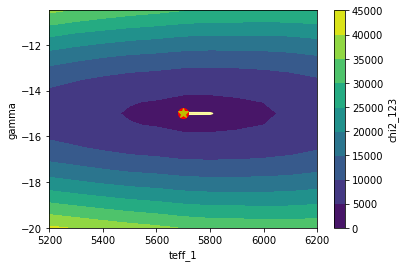

In [47]:
# EX 7 bhm recovery  on iam sim. snr=150
sim_example = SingleSimReader(base=ex7_base,
                       name="Example7150", mode="bhm", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['gamma',  chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct7, dof=2)
plt.show()

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example7/analysis/EXAMPLE7500/bhm for
 EXAMPLE7500**_coadd_bhm_chisqr_results.db
{'logg_1': 4.5, 'feh_1': 0.0}
(220, 8)


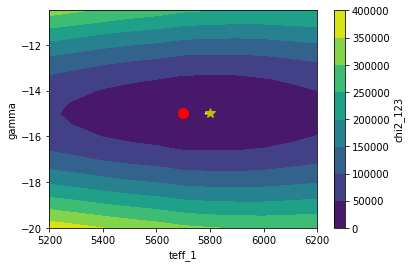

In [48]:
# EX 7 bhm recovery  on iam sim. snr=500
sim_example = SingleSimReader(base=ex7_base,
                       name="Example7500", mode="bhm", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['gamma',  chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct7, dof=2)
plt.show()

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example7/analysis/EXAMPLE7250/bhm for
 EXAMPLE7250**_coadd_bhm_chisqr_results.db
{'logg_1': 4.5, 'feh_1': 0.0}
(220, 8)


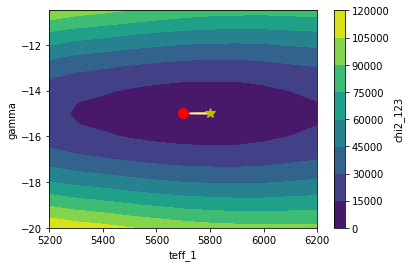

In [49]:
# EX 7 bhm recovery  on iam sim. snr=250
sim_example = SingleSimReader(base=ex7_base,
                       name="Example7250", mode="bhm", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['gamma',  chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct7, dof=2)
plt.show()

#  Example 8

Simulation with same parameters as HD211847  but similar RVs.

In [50]:
!cat Example8/Example8.sh 

# Simulate an observation
iam_fake_full_stack.py -n 150 -j 4 --renormalize -m linear EXAMPLE8150 1 5700 4.5 0.0 3200 5.0 0.0 6.6 0.5 --no-plots

# Do bhm anlaysis afterwards
bhm_script.py -j 4 --renormalize -m linear EXAMPLE8150 1 -b

# Simulate an observation
iam_fake_full_stack.py -n 500 -j 4 --renormalize -m linear  EXAMPLE8500 1 5700 4.5 0.0 3200 5.0 0.0 6.6 0.5 --no-plots

# Do bhm anlaysis afterwards
bhm_script.py -j 4 --renormalize -m linear EXAMPLE8500 1 -b

# Simulate an observation
iam_fake_full_stack.py -n 250 -j 4 --renormalize -m linear  EXAMPLE8250 1 5700 4.5 0.0 3200 5.0 0.0 6.6 0.5 --no-plots

# Do bhm anlaysis afterwards
bhm_script.py -j 4 --renormalize -m linear EXAMPLE8250 1 -b




iam_fake_full_stack.py -n 150 -j 4 --renormalize -m linear EXAMPLE8150 1 5700 4.5 0.0 3200 5.0 0.0 6.6 0.5 --only-plots
iam_fake_full_stack.py -n 500 -j 4 --renormalize -m linear  EXAMPLE8500 1 5700 4.5 0.0 3200 5.0 0.0 6.6 0.5 --only-plots
iam_fake_full_stack.py -n 250 -j 4 --renormalize 

In [51]:
ex8_base ="/home/jneal/Phd/Analysis/Paper_examples/Example8/analysis"
# ex8_base ="/home/jneal/Documents/data/Paper_examples/Example8/analysis"

correct8 = None
correct8 = {"teff_1":5700, "logg_2": 4.5, "feh_1": 0.0, "gamma":6.6,
           "teff_2": 3200, "logg_2": 5.0, "feh_2": 0.0,  "rv":0.5, "obsnum":1}

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example8/analysis/EXAMPLE8150/iam for
 EXAMPLE8150**_coadd_iam_chisqr_results.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(146880, 12)


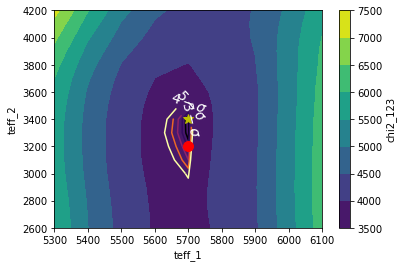

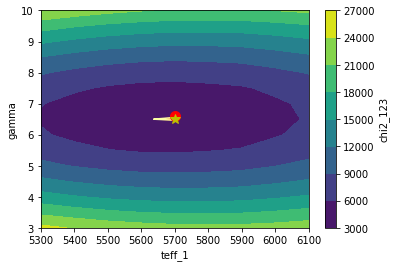

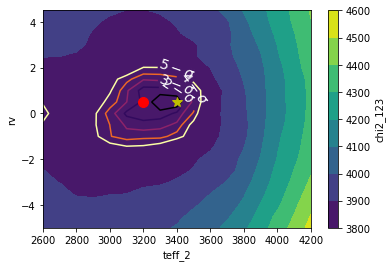

In [84]:
# EX 8 iam recovery on iam sim. sne=150
sim_example = SingleSimReader(base=ex8_base,
                       name="Example8150", mode="iam", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
        chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], correct=correct8, dof=4)
plt.show()
df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct8, ylim=[3,10], dof=4)
plt.show()
df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct8, dof=4)

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example8/analysis/EXAMPLE8500/iam for
 EXAMPLE8500**_coadd_iam_chisqr_results.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(146880, 12)


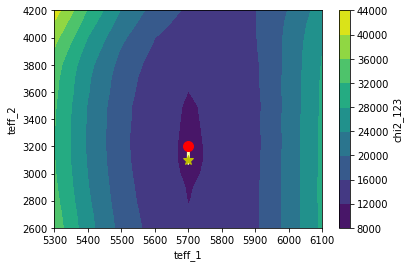

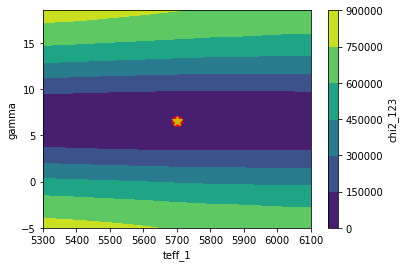

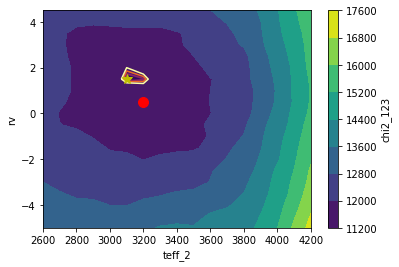

In [53]:
# EX 8 iam recovery on iam sim. sne=500
sim_example = SingleSimReader(base=ex8_base,
                       name="Example8500", mode="iam", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
        chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], correct=correct8, dof=4)
plt.show()
df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct8, dof=4)
plt.show()
df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct8, dof=4)

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example8/analysis/EXAMPLE8250/iam for
 EXAMPLE8250**_coadd_iam_chisqr_results.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(146880, 12)


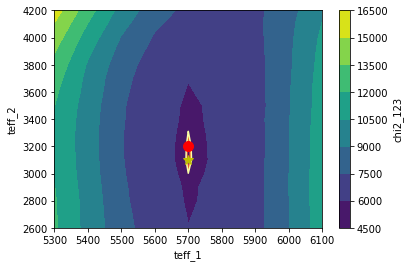

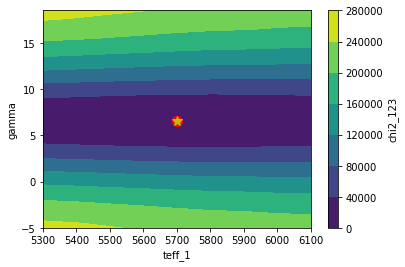

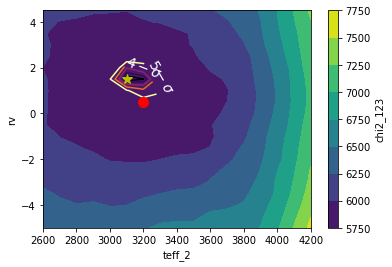

In [54]:
# EX 8 iam recovery on iam sim. sne=250
sim_example = SingleSimReader(base=ex8_base,
                       name="Example8250", mode="iam", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
        chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], correct=correct8, dof=4)
plt.show()
df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct8, dof=4)
plt.show()
df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct8, dof=4)

### Example 8 - BHM Recovery

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example8/analysis/EXAMPLE8150/bhm for
 EXAMPLE8150**_coadd_bhm_chisqr_results.db
{'logg_1': 4.5, 'feh_1': 0.0}
(432, 8)


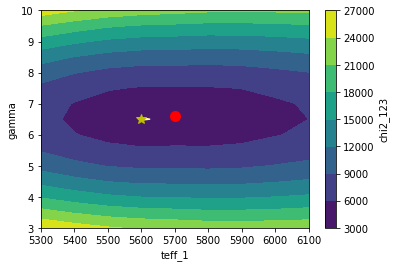

In [83]:
# EX 8 bhm recovery  on iam sim. snr=150
sim_example = SingleSimReader(base=ex8_base,
                       name="Example8150", mode="bhm", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['gamma',  chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct8, ylim=[3,10], dof=2)
plt.show()

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example8/analysis/EXAMPLE8500/bhm for
 EXAMPLE8500**_coadd_bhm_chisqr_results.db
{'logg_1': 4.5, 'feh_1': 0.0}
(432, 8)


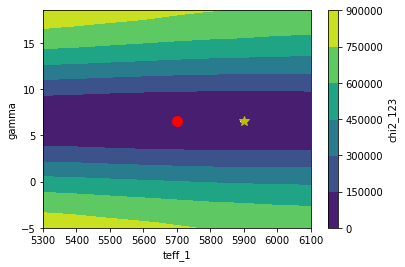

In [56]:
# EX 8 bhm recovery  on iam sim. snr=500
sim_example = SingleSimReader(base=ex8_base,
                       name="Example8500", mode="bhm", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)


cols = ['gamma',  chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct8, dof=2)
plt.show()

In [57]:
correct8.update({"star":"EXAMPLE8500"})
bhm_compare_spectra(sim_example.get_table(), params=correct8, save=False)

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example8/analysis/EXAMPLE8500/bhm for
 EXAMPLE8500**_coadd_bhm_chisqr_results.db


Exception: Invalid Arguments, expected a file that exists not. .parameter_files/EXAMPLE8500_params.dat

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example8/analysis/EXAMPLE8250/bhm for
 EXAMPLE8250**_coadd_bhm_chisqr_results.db
{'logg_1': 4.5, 'feh_1': 0.0}
(432, 8)


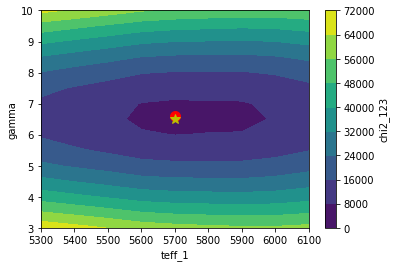

In [82]:
# EX 8 bhm recovery  on iam sim. snr=500
sim_example = SingleSimReader(base=ex8_base,
                       name="Example8250", mode="bhm", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['gamma',  chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct8, ylim=[3,10], dof=2)
plt.show()

#  Example 9

Simulation with same parameters as HD211847 but similar RVs.

In [21]:

get_ipython().system('cat Example9/Example9.sh ')



ex9_base ="/home/jneal/Phd/Analysis/Paper_examples/Example9/analysis"
# ex8_base ="/home/jneal/Documents/data/Paper_examples/Example9/analysis"

correct9 = None
correct9 = {"teff_1":5700, "logg_2": 4.5, "feh_1": 0.0, "gamma":6.6,
           "teff_2": 3200, "logg_2": 5.0, "feh_2": 0.0,  "rv":0.5, "obsnum":1}



cat: Example9/Example9.sh: No such file or directory


looking in  /home/jneal/Phd/Analysis/Paper_examples/Example9/analysis/EXAMPLE9150/iam for
 EXAMPLE9150**_coadd_iam_chisqr_results.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(878220, 12)


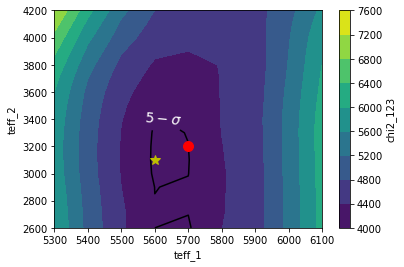

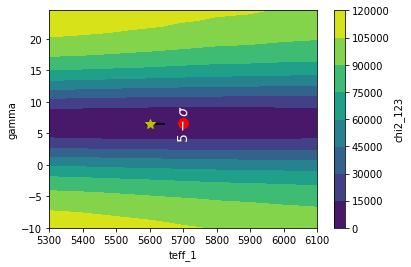

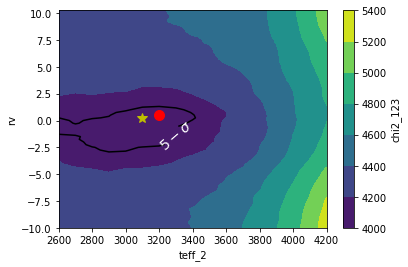

In [22]:

# EX 9 iam recovery on iam sim. sne=150
sim_example = SingleSimReader(base=ex9_base,
                       name="Example9150", mode="iam", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
        chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], correct=correct9, dof=4)
plt.show()
df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct9, dof=4)
plt.show()
df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct9, dof=4)



looking in  /home/jneal/Phd/Analysis/Paper_examples/Example9/analysis/EXAMPLE9500/iam for
 EXAMPLE9500**_coadd_iam_chisqr_results.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(878220, 12)


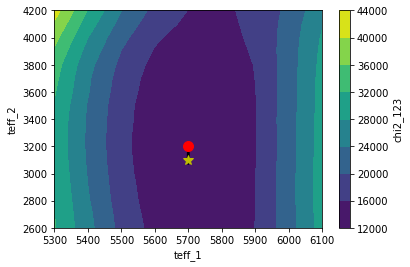

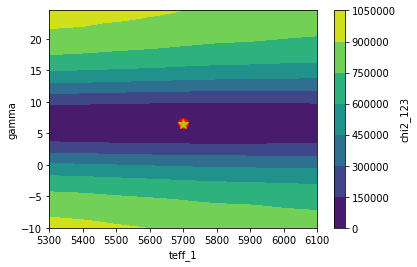

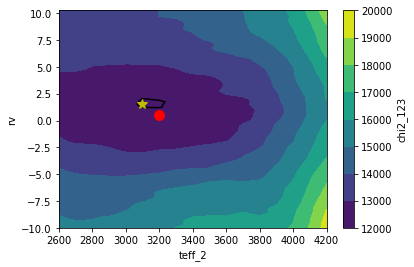

In [23]:

# EX 9 iam recovery on iam sim. sne=500
sim_example = SingleSimReader(base=ex9_base,
                       name="Example9500", mode="iam", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
        chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], correct=correct9, dof=4)
plt.show()
df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct9, dof=4)
plt.show()
df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct9, dof=4)



looking in  /home/jneal/Phd/Analysis/Paper_examples/Example9/analysis/EXAMPLE9250/iam for
 EXAMPLE9250**_coadd_iam_chisqr_results.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(878220, 12)


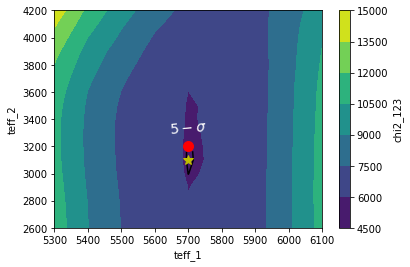

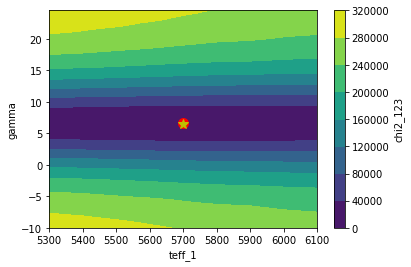

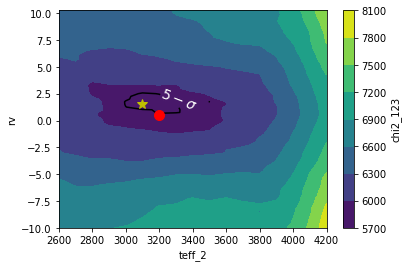

In [24]:

# EX 9 iam recovery on iam sim. sne=250
sim_example = SingleSimReader(base=ex9_base,
                       name="Example9250", mode="iam", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
        chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], correct=correct9, dof=4)
plt.show()
df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], correct=correct9, dof=4)
plt.show()
df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], correct=correct9, dof=4)



looking in  /home/jneal/Phd/Analysis/Paper_examples/Example9/analysis/EXAMPLE9150/bhm for
 EXAMPLE9150**_coadd_bhm_chisqr_results.db
{'logg_1': 4.5, 'feh_1': 0.0}
(630, 8)


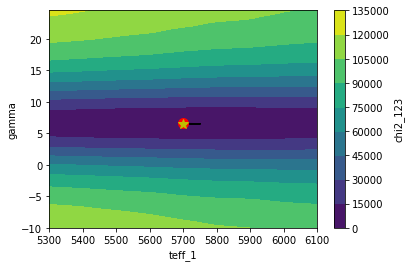

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example9/analysis/EXAMPLE9500/bhm for
 EXAMPLE9500**_coadd_bhm_chisqr_results.db
{'logg_1': 4.5, 'feh_1': 0.0}
(630, 8)


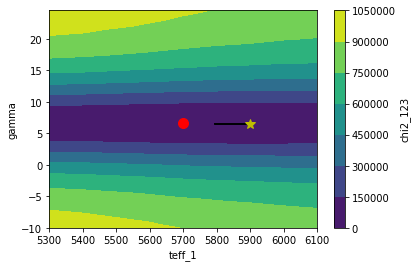

In [25]:
### Example 9 - BHM Recovery


# EX 9 bhm recovery  on iam sim. snr=150
sim_example = SingleSimReader(base=ex9_base,
                       name="Example9150", mode="bhm", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['gamma',  chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct9, dof=2)
plt.show()


# EX 9 bhm recovery  on iam sim. snr=500
sim_example = SingleSimReader(base=ex9_base,
                       name="Example9500", mode="bhm", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)


cols = ['gamma',  chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct9, dof=2)
plt.show()



correct9.update({"star":"EXAMPLE9500"})
#bhm_compare_spectra(sim_example.get_table(), params=correct9, save=False)



looking in  /home/jneal/Phd/Analysis/Paper_examples/Example9/analysis/EXAMPLE9250/bhm for
 EXAMPLE9250**_coadd_bhm_chisqr_results.db
{'logg_1': 4.5, 'feh_1': 0.0}
(630, 8)


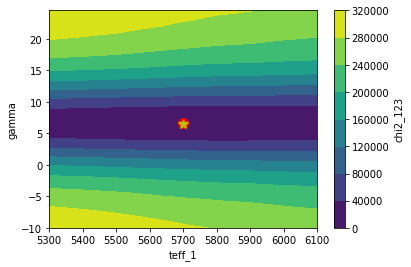

In [11]:
# EX 9 bhm recovery on iam sim. snr=250
sim_example = SingleSimReader(base=ex9_base,
                       name="Example9250", mode="bhm", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['gamma',  chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct9, dof=2)
plt.show()



# Example 6 high resolution

A sun like star with a 4000K companion. (M-dwarf)

In [15]:
chi2_val = "chi2_123"

In [16]:
ex6_base ="/home/jneal/Phd/Analysis/Paper_examples/Example6_highres/analysis/"
#  ="/home/jneal/Documents/data/Paper_examples/Example6/analysis"

correct6 = {"teff_1":5800, "logg_2": 4.5, "feh_1": 0.0, "gamma":-15,
           "teff_2": 4000, "logg_2": 5.0, "feh_2": 0.0,  "rv":20}

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example6_highres/analysis/EXAMPLE6150RES/iam for
 EXAMPLE6150RES**_coadd_iam_chisqr_results.db
{'logg_1': 4.5, 'logg_2': 5.0, 'feh_1': 0.0, 'feh_2': 0.0}
(2178176, 12)


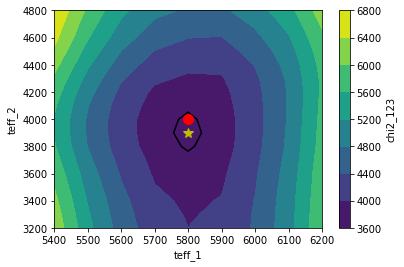

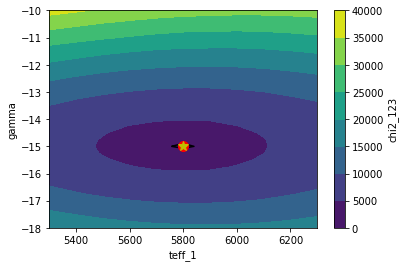

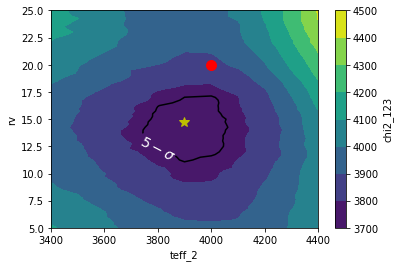

In [17]:
# EX 6 iam recovery on iam sim. sne=150
sim_example = SingleSimReader(base=ex6_base,
                       name="Example6150RES", mode="iam", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['teff_2', 'logg_2', 'feh_2', 'rv', 'gamma',
        chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "logg_2", "feh_1", "feh_2"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()
kwargs = {"correct": correct6, "dof": 4, }  
df_contour(df, "teff_1", "teff_2", chi2_val, df_min, ["gamma", "rv"], xlim= [5400, 6200],  **kwargs)
plt.show()
df_contour(df, "teff_1", "gamma", chi2_val, df_min, ["teff_2", "rv"], ylim= [-18, -10], **kwargs)
plt.show()
df_contour(df, "teff_2", "rv", chi2_val, df_min, ["gamma", "teff_1"], xlim= [3400, 4400], ylim= [5, 25], **kwargs)

In [18]:
# Example 6 - BHM Recovery

looking in  /home/jneal/Phd/Analysis/Paper_examples/Example6_highres/analysis/EXAMPLE6150RES/bhm for
 EXAMPLE6150RES**_coadd_bhm_chisqr_results.db
{'logg_1': 4.5, 'feh_1': 0.0}
(1144, 8)


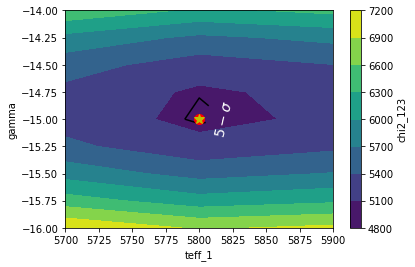

In [20]:
# EX 6 bhm recovery  on iam sim. snr=150
sim_example = SingleSimReader(base=ex6_base,
                       name="Example6150RES", mode="bhm", chi2_val=chi2_val)

extractor = DBExtractor(sim_example.get_table())

df_min = extractor.minimum_value_of(chi2_val)

cols = ['gamma',  chi2_val, 'teff_1','logg_1', 'feh_1']


fixed = {key: df_min[key].values[0] for key in ["logg_1", "feh_1"]}
print(fixed)
df = extractor.fixed_extraction(cols, fixed, limit=-1)
print(df.shape)
df.head()

df_contour(df, "teff_1", "gamma", chi2_val, df_min, [], correct=correct6, dof=2, xlim=[5700, 5900], ylim=[-16, -14])
plt.show()